### Implement linear regression on the housing dataset (house price prediction with 2-dim features(square feet and number of bedrooms) )

#### 2D Housing Data 
- Features (x1 -> square feet, x2 -> number of bedrooms)
- Price (y -> Selling price)

In [12]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import csv

# this allows plots to appear directly in the notebook
%matplotlib inline
%config IPCompleter.greedy=True
# load data using numpy
data = np.loadtxt('housing_prices.txt', delimiter=',')
X1 = data[:, 0]
X2 = data[:, 1]
Y  = data[:, 2]
tests_count = 10      # Test count
total_count = len(Y)
train_count = len(Y) - tests_count 

# Training Set
x1_train = X1[np.arange(0,train_count)]
x2_train = X2[np.arange(0,train_count)]
y_train  =  Y[np.arange(0,train_count)]

# Test Set
x1_tests = X1[np.arange(train_count,total_count)]
x2_tests = X2[np.arange(train_count,total_count)]
y_tests  =  Y[np.arange(train_count,total_count)]

print('Total\t: ', total_count)
print('Test \t: ', len(y_tests))
print('Train\t: ', len(y_train))

Total	:  47
Test 	:  10
Train	:  37


### (a) Visualize Data

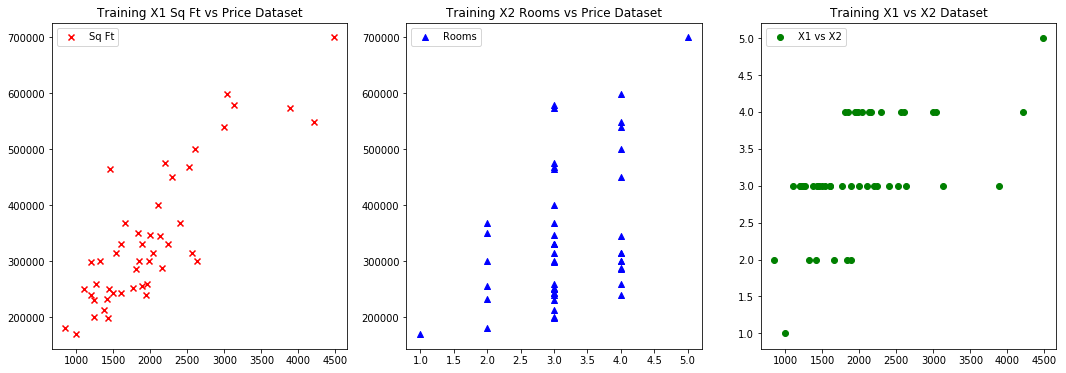

In [13]:
# Plot X1,X2 vs Y
fig,(ax1,ax2, ax3) = plt.subplots(1,3,figsize=(18,6))
ax1.scatter(X1, Y, color = 'r',marker='x', label = 'Sq Ft')
ax1.set_title('Training X1 Sq Ft vs Price Dataset')
ax1.legend() 
ax2.scatter(X2, Y, color = 'b',marker='^', label = 'Rooms')
ax2.set_title('Training X2 Rooms vs Price Dataset')
ax2.legend() 
ax3.scatter(X1, X2, color = 'g',marker='o', label = 'X1 vs X2')
ax3.set_title('Training X1 vs X2 Dataset')
ax3.legend()    

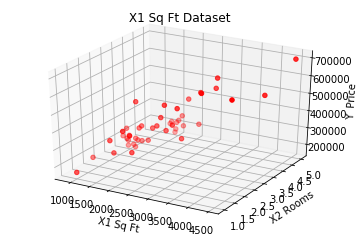

In [14]:
# Plot X1,X2, Y
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, X2, Y, c='r', marker='o')
ax.set_title(' X1 Sq Ft Dataset')
ax.set_xlabel('X1 Sq Ft')
ax.set_ylabel('X2 Rooms')
ax.set_zlabel('Y  Price')
plt.show()


### (b) Linear Loss Function with update rule 
- Least square based loss function

In [215]:
import random

# Initialize our perceptron
one_train = np.empty(len(x1_train)); one_train.fill(0)
x_train = np.vstack((one_train, x1_train, x2_train))
print(x_train.shape)

def leastSquareErrorCost():
    count = 0
    w = np.matrix([[0], 
                   [0], 
                   [0]])
    alpha = 1;
    m = y_train.size;
    for iteration in range(0,3):
        delta_sum = np.zeros(shape=(3, 1))
       # print(delta_sum)
        y_hat = 0
        for i in range (0,37):
            y_hat = (w.T).dot(x_train[:,i])
           # print(y_hat)
            delta_sum[0][0] = delta_sum[0][0] + (alpha*((y_hat-y_train[i]) * x_train[0,i]))
            delta_sum[1][0] = delta_sum[1][0] + (alpha*((y_hat-y_train[i]) * x_train[1,i]))
            delta_sum[2][0] = delta_sum[2][0] + (alpha*((y_hat-y_train[i]) * x_train[2,i]))
        grad = (delta_sum/m)
        w = w - grad
        print(w)

    


# Run LSE update
leastSquareErrorCost()

(3, 37)
[[0.00000000e+00]
 [7.76611182e+08]
 [1.12907249e+06]]
[[ 0.00000000e+00]
 [-3.54268499e+15]
 [-5.10070774e+12]]
[[0.00000000e+00]
 [1.61607504e+22]
 [2.32680199e+19]]


In [208]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = y.size
    
    for i in range(num_iters):
        predictions = X.dot(theta).flatten()
        print(predictions.shape)
        print(y.shape)
        #print(X)
        errors_x1 = (predictions - y) * X[:, 0].reshape(37,1)
        errors_x2 = (predictions - y) * X[:, 1].reshape(37,1)
        print(errors_x1)
        print(errors_x1.sum())
        theta[0][0] = theta[0][0] - alpha * (1.0 / m) * errors_x1.sum()
        theta[1][0] = theta[1][0] - alpha * (1.0 / m) * errors_x2.sum()
        print(i,'.) ----------------> \n',theta)
    return theta

w = np.matrix([[0], 
               [0]])
x_train1 = np.vstack((x1_train, x2_train))
#print(y_train)#print('Delta: ', delta)
#print(y_train.reshape(1,37))
gradient_descent(x_train1.T, y_train.reshape(1,37), w, 1, 5)

(1, 37)
(1, 37)
[[-2.87346137e+10]]
-28734613725.0
0 .) ----------------> 
 [[776611181]
 [  1129072]]
(1, 37)
(1, 37)
[[1.31079373e+17]]
1.3107937328357566e+17
1 .) ----------------> 
 [[-2147483648]
 [-2147483648]]
(1, 37)
(1, 37)
[[-3.62981628e+17]]
-3.6298162846612915e+17
2 .) ----------------> 
 [[-2147483648]
 [-2147483648]]
(1, 37)
(1, 37)
[[-3.62981628e+17]]
-3.6298162846612915e+17
3 .) ----------------> 
 [[-2147483648]
 [-2147483648]]
(1, 37)
(1, 37)
[[-3.62981628e+17]]
-3.6298162846612915e+17
4 .) ----------------> 
 [[-2147483648]
 [-2147483648]]


matrix([[-2147483648],
        [-2147483648]])

In [139]:
w = np.matrix([[1], 
                   [1], 
                   [1]])

print(w/37)


[[0.02702703]
 [0.02702703]
 [0.02702703]]
